# Improving DNNs
- 好的初始化： 打破平衡，各单元各尽所能
- 正则化： 防止过拟合
- 梯度检查： 检查梯度是否算错

## obj1: 好的初始化
- 能加快梯度下降
- 能收敛到更小的训练误差

- 三种初始化方式：
    - 零初始化 Zeros initialization： 不能打破对称性
    - 随机初始化 Random initialization： 打破对称性，不同单元学习不同的事 
    - He初始化 He initialization：  配合Relu单元效果很好

### step1: 准备包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

c:\users\lxb\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### step2: 准备数据

train_X: (2, 300)
train_Y: (1, 300)
test_X: (2, 100)
test_Y: (1, 100)


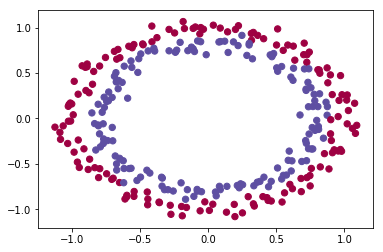

In [3]:
# 红蓝点数据
train_X, train_Y, test_X, test_Y = load_dataset()

print("train_X: "+ str(train_X.shape))
print("train_Y: "+ str(train_Y.shape))
print("test_X: "+ str(test_X.shape))
print("test_Y: "+ str(test_Y.shape))

### step3: 神经网络模型

In [4]:
# 三层神经网络模型
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
   
    grads = {}
    costs = [] # 跟踪代价
    m = X.shape[1] # 样本数
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # 初始化方式
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # 迭代梯度下降
    for i in range(0, num_iterations):

        # 前向传播，relu->relu->sigmoid
        a3, cache = forward_propagation(X, parameters)
        
        # 计算代价
        cost = compute_loss(a3, Y)

        # 后向传播
        grads = backward_propagation(X, Y, cache)
        
        # 参数更新
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # 打印代价
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # 画出代价
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### step4: 0初始化

In [5]:
# 0
def initialize_parameters_zeros(layers_dims):
   
    parameters = {}
    L = len(layers_dims)           
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

In [6]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


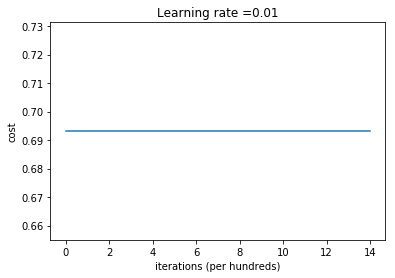

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [7]:
# 训练模型
parameters = model(train_X, train_Y, initialization = "zeros")

# 训练集上预测
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# 测试集上预测
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


0初始化的结果很不好，代价几乎没有下降,why?
- 因为0初始化未能打破对称性，每个节点都是进行同样的计算，这样神经网络就可以看成是一串神经元，这并不比线性分类器（逻辑回归）更好
- 要破坏对称性，应该使用随机初始化的方法

### step5：random初始化

In [11]:
# random
def initialize_parameters_random(layers_dims):
    np.random.seed(3)             
    parameters = {}
    L = len(layers_dims)          
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

In [12]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


D:\lxb\Jupyter\deeplearnai\assignment2_1\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\lxb\Jupyter\deeplearnai\assignment2_1\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6244405061689552
Cost after iteration 2000: 0.5979643914272642
Cost after iteration 3000: 0.5637254162165872
Cost after iteration 4000: 0.5501640269883202
Cost after iteration 5000: 0.5444721253481484
Cost after iteration 6000: 0.5374632031142033
Cost after iteration 7000: 0.4777312272455887
Cost after iteration 8000: 0.39784053333340974
Cost after iteration 9000: 0.3934906959402653
Cost after iteration 10000: 0.3920338616006118
Cost after iteration 11000: 0.38928474137191077
Cost after iteration 12000: 0.3861583623847435
Cost after iteration 13000: 0.38498646217082794
Cost after iteration 14000: 0.38279729866923734


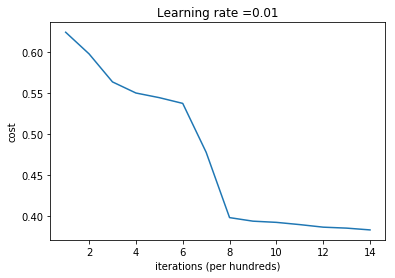

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [13]:
# 训练模型
parameters = model(train_X, train_Y, initialization = "random")

# 训练集上预测
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# 测试集上预测
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


In [14]:
#预测值
#训练集上的预测
print (predictions_train)
#测试集上的预测
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


ValueError: c of shape (1, 300) not acceptable as a color sequence for x with size 300, y with size 300

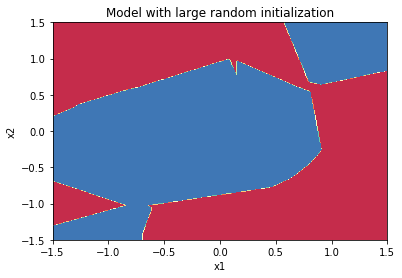

In [15]:
#决策边界
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

：random随机初始化的效果比0初始化的效果好得多，代价一致在下降，决策边界明显
- 随机初始化打破了对称平衡
- 开始代价很高（inf），这时因为权值比较大（*10），这容易导致梯度爆炸，过小的权值容易导致梯度消失，但是依然能够减小代价。
- 训练的时间长可以减小代价，但是初始权值过大，需要优化的时间也就长
- 小权值的随机初始化，表现得更好，但是权值应该多小呢？——He 初始化

### step6: He初始化

In [20]:
# he
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

In [21]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.41386458170717944
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.1501555628037181
Cost after iteration 11000: 0.12325079292273546
Cost after iteration 12000: 0.09917746546525932
Cost after iteration 13000: 0.08457055954024277
Cost after iteration 14000: 0.07357895962677367


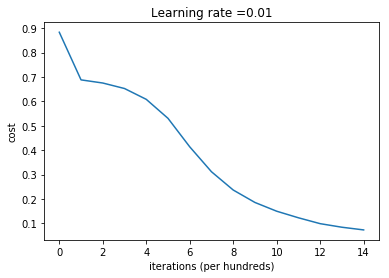

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [22]:
# 训练模型
parameters = model(train_X, train_Y, initialization = "he")

# 训练集上预测
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# 测试集上预测
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


In [23]:
#预测值
#训练集上的预测
print (predictions_train)
#测试集上的预测
print (predictions_test)

[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


ValueError: c of shape (1, 300) not acceptable as a color sequence for x with size 300, y with size 300

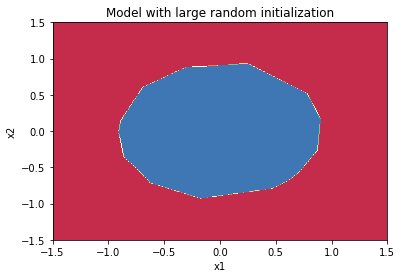

In [24]:
#决策边界
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

: He初始化的效果比单纯的随机初始化效果好的多，因为权值不是很大，

## obj2: 正则化 Regularization
- 防止过拟合（overfit）
- 假设：小权值模型比大权值模型更简单，减少权值
- 正则化的方式：
    - L1正则化
    - L2正则化 ，有效，权重衰减，激活线性部分
    - dropout正则化， 非常有效，随机失活神经元， 权值分散
    - 翻转图像，加点扰动

### step1: 导包

In [1]:
# 导包
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

c:\users\lxb\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### step2: 准备数据

train_X: (2, 211)
train_Y: (1, 211)
test_X: (2, 200)
test_Y: (1, 200)


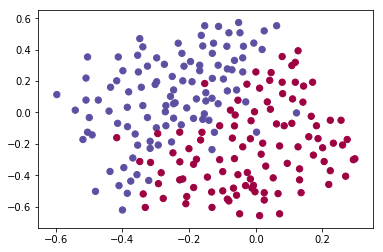

In [3]:
# 2D games data
train_X, train_Y, test_X, test_Y = load_2D_dataset()

print("train_X: "+ str(train_X.shape))
print("train_Y: "+ str(train_Y.shape))
print("test_X: "+ str(test_X.shape))
print("test_Y: "+ str(test_Y.shape))

### step3: 没有正则化的NN模型

In [4]:
# NN model
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
  
    grads = {}
    costs = []                            
    m = X.shape[1]                        
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # 初始化参数
    parameters = initialize_parameters(layers_dims)

    # 迭代梯度下降
    for i in range(0, num_iterations):

        # 前向传播: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # 代价计算
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # 后向传播.
        assert(lambd==0 or keep_prob==1)    
        
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # 参数更新
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # 打印代价
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # 画出代价
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724207
Cost after iteration 20000: 0.1385164242326959


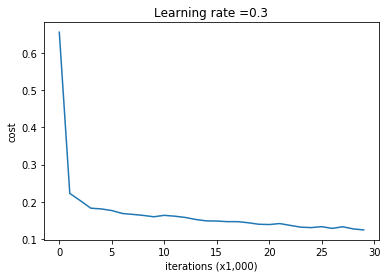

On the train set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [5]:
# 训练模型
parameters = model(train_X, train_Y)

# 训练集上预测
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# 测试集上预测
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


ValueError: c of shape (1, 211) not acceptable as a color sequence for x with size 211, y with size 211

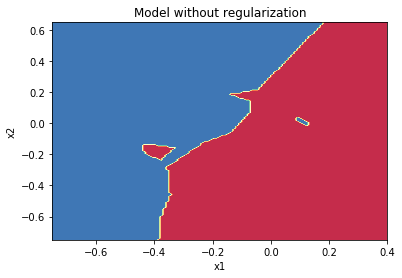

In [6]:
#决策边界
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

：基本模型明显过拟合了，从决策边界可以看出来，在电解处的细节都拟合得很好，说明拟合了一些噪声

### step4: L2正则化

In [7]:
# 计算L2正则化代价
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    #交叉熵代价
    cross_entropy_cost = compute_cost(A3, Y)
  
    L2_regularization_cost =lambd/m/2*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))
  
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [8]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

cost = 1.7864859451590758


In [13]:
# L2正则化后向传播
def backward_propagation_with_regularization(X, Y, cache, lambd):
  
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m*W3
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
   
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m*W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
   
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m*W1
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [14]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)
print ("dW1 = "+ str(grads["dW1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("dW3 = "+ str(grads["dW3"]))

dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]


Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282238
Cost after iteration 20000: 0.26809163371273004


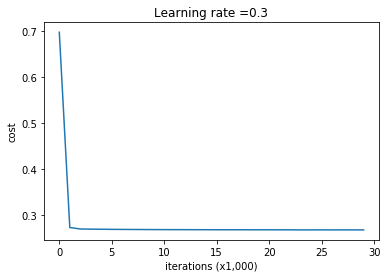

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [16]:
# 训练模型
parameters = model(train_X, train_Y,lambd = 0.7)

# 训练集上预测
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# 测试集上预测
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


ValueError: c of shape (1, 211) not acceptable as a color sequence for x with size 211, y with size 211

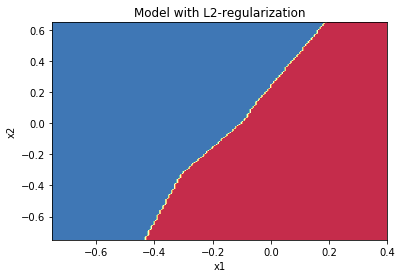

In [17]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

：加入L2正则化后，测试集上的误差和训练集上的误差相差不大，并且没有拟合细节
- lambd 是一个超参数，可以在验证集上进行调整
- lambd越大分类边界越平滑，偏差越大
- L2正则化为什么有效?
    - 假设：具有小权值的模型比大权值的模型更简单
    - 加入L2正则项的代价惩罚权值，使其变小，权重衰减
    - 在tanh或sigmoid函数里小权值对应线性部分
    - 线性网络偏差大
    - 

### step5: dropout 失活
- 随机失活一些神经元
- 失活的神经元不参与训练的前向和后向传播
- 不把权重集中在某个单元，分散权重，权值变小
- 输出期望值不变

In [20]:
# 前向失活
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    
    np.random.seed(1)
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])                                         # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = D1<keep_prob                                         # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = np.multiply(A1,D1)                                         # Step 3: shut down some neurons of A1
    A1 = A1/keep_prob                            # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])                                       # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = D2<keep_prob                                           # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = np.multiply(A2,D2)                                         # Step 3: shut down some neurons of A2
    A2 = A2/keep_prob                                          # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [21]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, keep_prob = 0.7)
print ("A3 = " + str(A3))

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


In [22]:
#反向失活
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
   
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = np.multiply(dA2,D2)              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2/keep_prob              # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = np.multiply(dA1,D1)              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1/keep_prob               # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [23]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, keep_prob = 0.8)

print ("dA1 = " + str(gradients["dA1"]))
print ("dA2 = " + str(gradients["dA2"]))

dA1 = [[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = [[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


Cost after iteration 0: 0.6543912405149825


D:\lxb\Jupyter\deeplearnai\assignment2_1\reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\lxb\Jupyter\deeplearnai\assignment2_1\reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.0610169865749056
Cost after iteration 20000: 0.060582435798513114


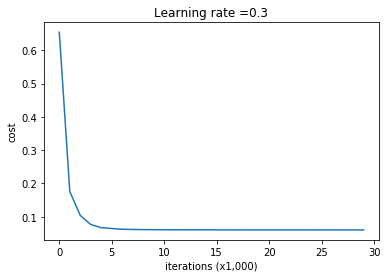

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [24]:
#训练模型 - dropout
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

#训练集上预测
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

#测试集上预测
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

在训练集上的表现还不如测试集上的表现，说明dropout成功避免了过拟合，减小了方差

ValueError: c of shape (1, 211) not acceptable as a color sequence for x with size 211, y with size 211

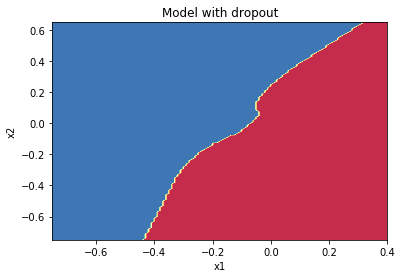

In [33]:
#决策边界
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Remenber:
- 只在训练时采用dropout,前向和后向都需要
- 测试的时候不用dropout
- dropout后的输出期望值和dropout之前的输出期望值不变，因此需要A/keep_prob




## obj3: 梯度检查 Gradient Checking
- 检查梯度计算是否正确

### step1: 导包

In [27]:
import numpy as np
from testCases import *
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

### step2：简单函数的梯度检查

In [42]:
# 简单的前向
def forward_propagation(x, theta):
    J = x*theta
    return J

In [43]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


In [44]:
# 简单的后向
def backward_propagation(x, theta):
    dtheta = x
    return dtheta

In [45]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


In [47]:
#简单函数的梯度检查
def gradient_check(x, theta, epsilon = 1e-7):
    #近似梯度
    thetaplus = theta+epsilon                               # Step 1
    thetaminus = theta-epsilon                              # Step 2
    J_plus = forward_propagation(x, thetaplus)                                  # Step 3
    J_minus = forward_propagation(x, thetaminus)                               # Step 4
    gradapprox = (J_plus-J_minus)/(2*epsilon)                              # Step 5

    #反向求梯度
    grad = backward_propagation(x, theta)
    
    #检查梯度
    numerator =  np.linalg.norm(grad-gradapprox)                               # Step 1'
    denominator = np.linalg.norm(grad)+np.linalg.norm(gradapprox)                             # Step 2'
    difference = numerator/denominator                             # Step 3'
   
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [48]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


### step3: NN网络梯度检查

In [51]:
#前向
def forward_propagation_n(X, Y, parameters):
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [52]:
#反向
def backward_propagation_n(X, Y, cache):
   
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = 1*(A3 - Y)
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 =1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 =1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    
    return gradients

In [53]:
#梯度检查
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
   
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i][0]+epsilon                                # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))                                   # Step 3
        ### END CODE HERE ###
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                      # Step 1
        thetaminus[i][0] = thetaminus[i][0]-epsilon                                # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))                                     # Step 3
        ### END CODE HERE ###
        
        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i]-J_minus[i])/(2.*epsilon)
        ### END CODE HERE ###
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad-gradapprox)                                           # Step 1'
    denominator = np.linalg.norm(grad)+np.linalg.norm(gradapprox)                                         # Step 2'
    difference = numerator/denominator                                          # Step 3'
    ### END CODE HERE ###

    if difference > 1e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [54]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

There is a mistake in the backward propagation! difference = 1.189041787877932e-07


- 梯度检查 
    - 无dropout